In [1]:
import os
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt

import torchvision
from torchvision import transforms
import pytorch_lightning as pl
from torch.utils.data import Dataset, random_split, DataLoader
from pytorch_lightning import Trainer

from glob import glob

/Users/sofija/miniforge3/envs/torch_m1/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [29]:
%load_ext lab_black

In [3]:
from typing import Any, Tuple, Optional, Callable

In [4]:
os.chdir("/Users/sofija/Ai4er/mres/tree-segmentation" )
os.getcwd()

'/Users/sofija/Ai4er/mres/tree-segmentation'

In [5]:
from src.datasets import TreeSegments

In [6]:
test_read = np.loadtxt('data/raw/samples/Capture_Sample_22_47', 
                       delimiter=",", usecols=range(0,3))

In [7]:
test_depth = test_read[:,2].reshape(120, 160)

(-0.5, 159.5, 119.5, -0.5)

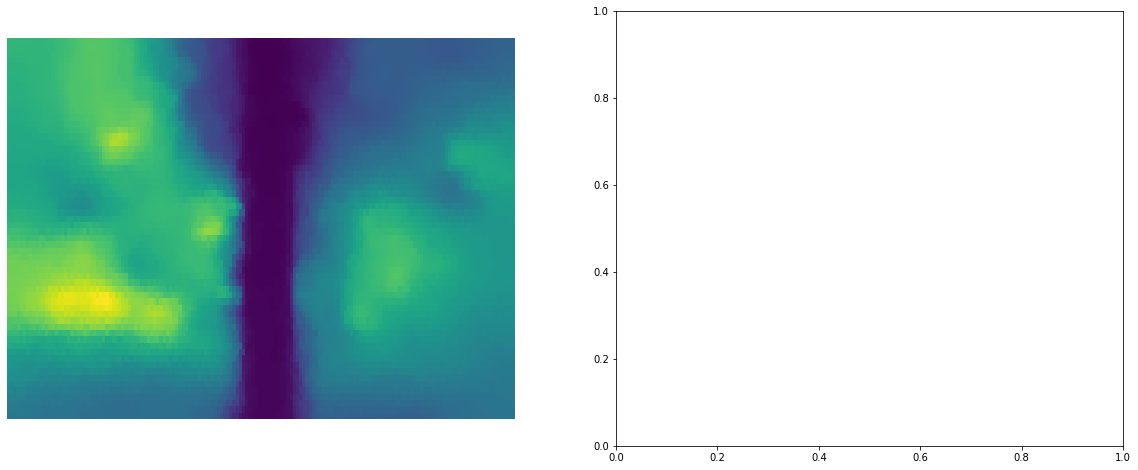

In [8]:
ncols = 2
nrows = 1

sample_n = 0

fig, axs = plt.subplots(
    nrows=1,
    ncols=ncols,
    figsize=(20, ncols * 4),
)
# permute to rearrange the rgb channel to be last 
axs[0].imshow(test_depth)
axs[0].axis("off")

# msk = mask[sample_n, :, :]
# msk = torch.squeeze(msk)
# axs[1].imshow(msk)
# axs[1].axis("off")

## Calculate the mean and standard dev of the dataset

In [78]:
augs = transforms.Compose([transforms.ToTensor(), 
                           transforms.Normalize(mean = (0, 0, 0),
                              std  = (1, 1, 1)),])

In [79]:
ds = TreeSegments(depth_dir='data/raw/samples/',
                  mask_dir='data/segmented/',
                 train=False)

In [65]:
# ds.depth_paths

In [80]:
ds[1].shape

(120, 160)

In [84]:
####### COMPUTE MEAN / STD

# placeholders
psum    = torch.tensor([0.0])
psum_sq = torch.tensor([0.0])

# loop through images
for i in range(len(ds)):
    psum    += ds[i].sum()
    psum_sq += (ds[i] ** 2).sum()

In [85]:
# pixel count
count = len(ds) * 120 * 160

# mean and std
total_mean = psum / count
total_var  = (psum_sq / count) - (total_mean ** 2)
total_std  = torch.sqrt(total_var)

# output
print('mean: '  + str(total_mean))
print('std:  '  + str(total_std))

mean: tensor([3.5133])
std:  tensor([1.6922])


## Loading data from dataloaders

In [9]:
from src.datamodules import TreeDataModule

In [25]:
ds = TreeSegments(data_dir='data/raw/samples/',
                  target_dir='data/segmented/',
                 train=True, )

In [15]:
dm = TreeDataModule(data_dir='data/raw/samples/',
                  target_dir='data/segmented/',)

In [16]:
dm.setup(stage="fit")

In [17]:
train_dl = dm.train_dataloader()

In [18]:
for sample in train_dl:
    img = sample[0]
    mask = sample[1]

In [19]:
img.shape

torch.Size([8, 1, 120, 160])

In [21]:
mask.shape

torch.Size([8, 1, 120, 160])

(-0.5, 159.5, 119.5, -0.5)

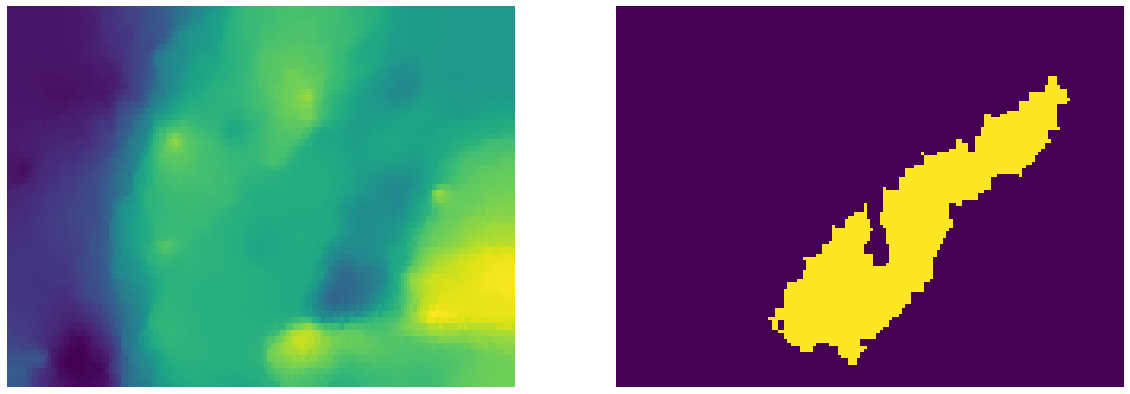

In [24]:
ncols = 2
nrows = 1

sample_n = 7

fig, axs = plt.subplots(
    nrows=1,
    ncols=ncols,
    figsize=(20, ncols * 4),
)

img = torch.squeeze(img)
axs[0].imshow(img[sample_n, :, :])
axs[0].axis("off")

msk = torch.squeeze(mask)
msk = msk[sample_n, :, :]
axs[1].imshow(msk)
axs[1].axis("off")